# Example usage

Here we will demonstrate how to use `pynyairbnb` to run an analysis on New York City Airbnb Data.

In [1]:
from pynyairbnb.data_preprocessing import create_dir_if_not_exists, read_data, convert_missing_values, split_data, save_dataframes, add_price_category, data_preprocessing
from pynyairbnb.plotting import rank_correlations, sns_plotting, plot_pynyairbnb
from pynyairbnb.pynyairbnb import build_preprocessor, build_clf_model, knn_param_optimization, nyairbnb_analysis
import pandas as pd

# Reading and Preprocessing Data

We can use the `data_preprocessing` function from the `data_preprocessing` module to load and prepare the data before moving onto later analyses. This function is a union of several other smaller functions in the module like `read_data` and `convert_missing_values`, all of which can also be accessed if and when needed. `data_preprocessing` loads the data from the URL, performs the necessary EDA, splits the data into training and test dataframes and saves them all as CSVs to the provided outpath.

In [2]:
data_preprocessing("http://data.insideairbnb.com/united-states/ny/new-york-city/2023-12-04/visualisations/listings.csv", "sample_data")

In [3]:
train_df = pd.read_csv("sample_data/train_df.csv")
train_df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,price_category
0,35939805,Rental unit in Brooklyn · ★5.0 · 1 bedroom · 1...,104423008,Mimi,Brooklyn,Bedford-Stuyvesant,40.68754,-73.94240,Private room,49,30,9,2019-08-29,0.17,1,0,0,NaN,0-50
1,53589437,Rental unit in New York · ★4.07 · 1 bedroom · ...,401202937,Eliza,Manhattan,Midtown,40.74839,-73.98830,Private room,131,1,56,2023-11-04,2.60,58,0,29,Exempt,100-150
2,18689588,Rental unit in Brooklyn · ★4.83 · 1 bedroom · ...,127767,Cara,Brooklyn,Bedford-Stuyvesant,40.69187,-73.95467,Entire home/apt,109,30,6,2018-08-18,0.08,1,0,0,NaN,100-150


# Creating Visualizations

The `plotting` module has a couple of functions that are quite handy to help generate the plots and tables we need for the analysis. We can use the `plot_pynyairbnb` function to create _all_ the visualizations and tables we would need for the analysis in one go. However, if you want, you can also call one of the contained functions `rank_correlations` or `sns_plotting` where and when necessary.

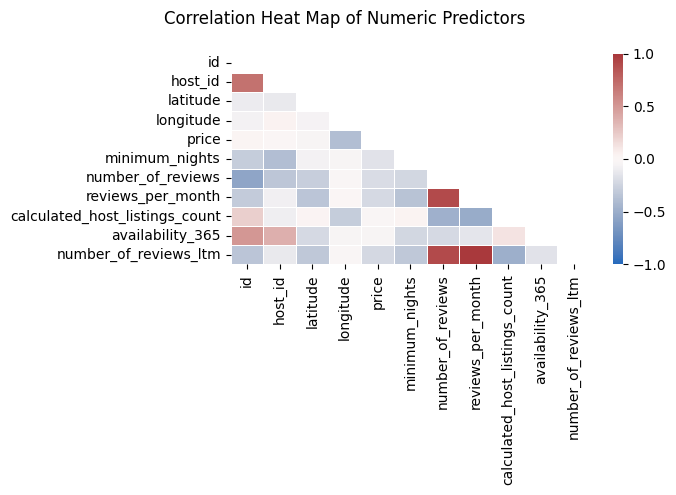

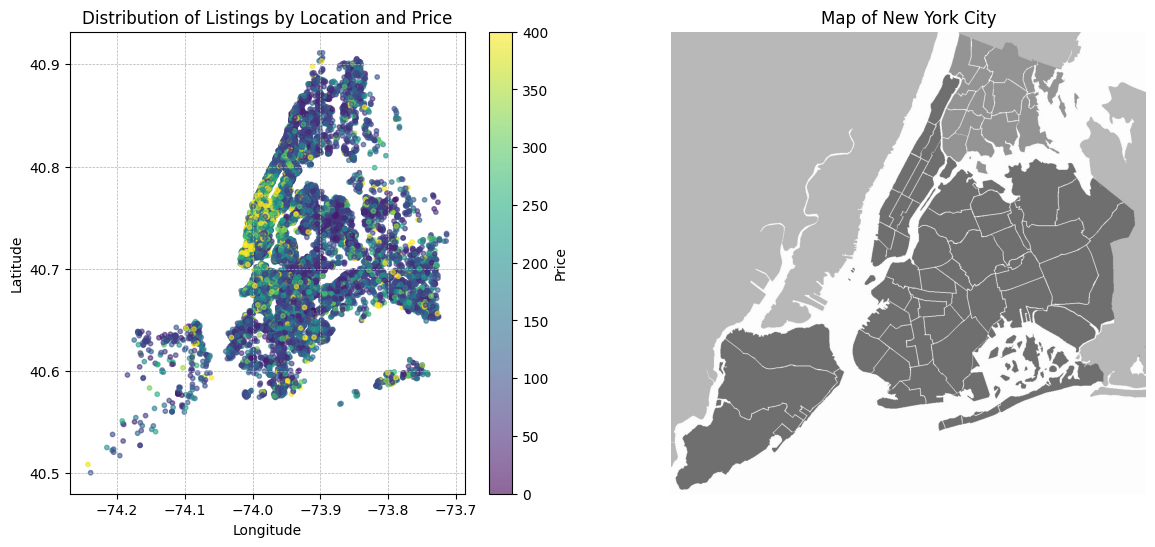

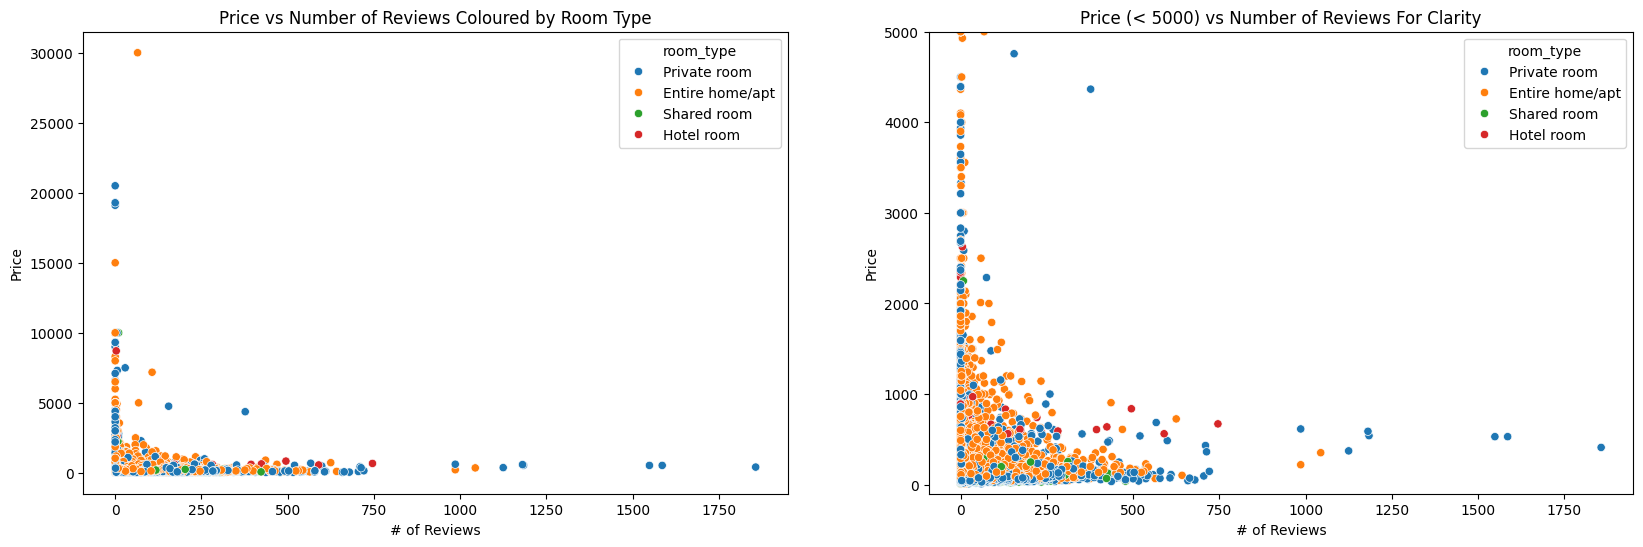

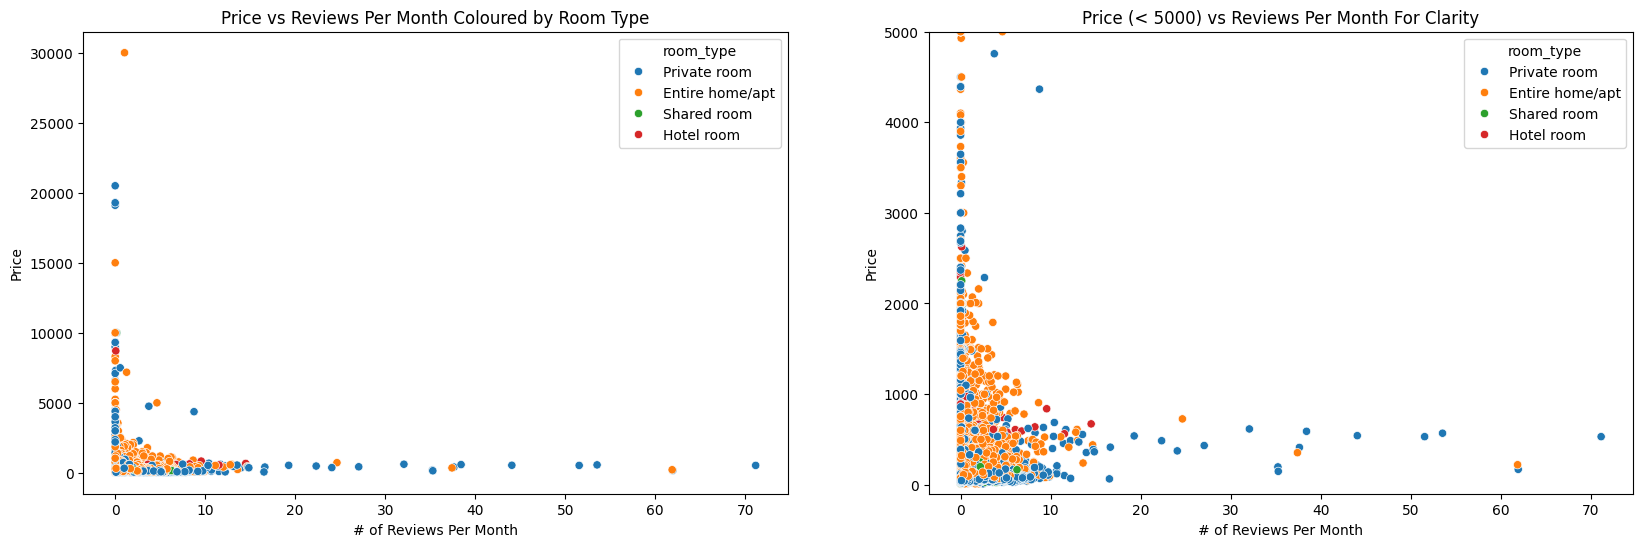

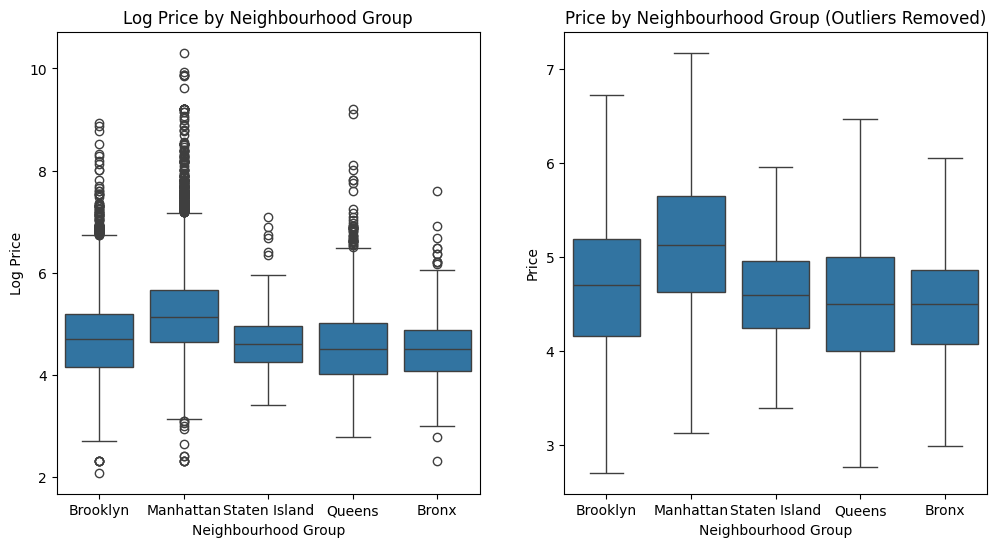

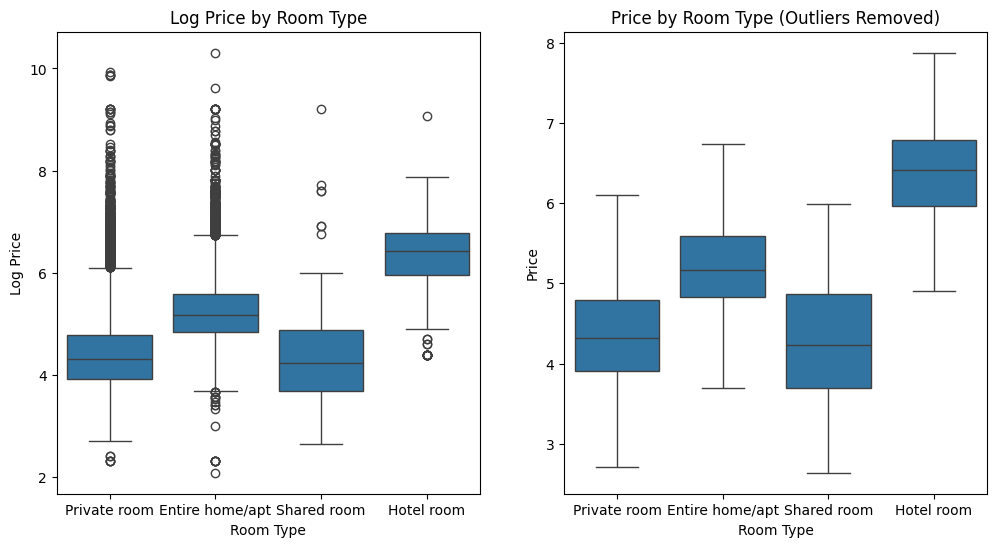

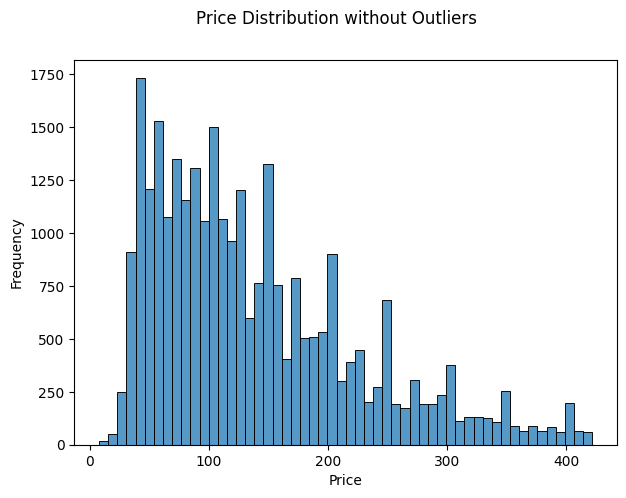

In [4]:
plot_pynyairbnb("sample_data/train_df.csv", "sample_results/figures", "sample_results/tables")

# Building the model and Assessing it

We have the `nyairbnb_analysis` function from the `pynyairbnb` to run our entire analysis from top to bottom (including hyperparameter optimization). This function is a union of the other 3 functions in the module - `build_preprocessor`, `build_clf_model` `knn_param_optimization`, all of which can also be accessed if and when needed. `nyairbnb_analysis` loads the data from the provided input directory, builds the model and performs the optimization, and saves the outputs as tables to the provided output directory.

NOTE: The function `knn_param_optimization` (and as a result, the `nyairbnb_analysis` function) can take about 5 minutes to run.

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
nyairbnb_analysis("sample_data", "sample_results/tables")
hyperparam_opt = pd.read_csv("sample_results/tables/hyperparam_classification_report.csv")
hyperparam_opt

Fitting 3 folds for each of 5 candidates, totalling 15 fits


,Unnamed: 0,precision,recall,f1-score,support
0,0-50,0.669546,0.604878,0.635572,1025.000000
1,50-100,0.541002,0.675939,0.600989,2157.000000
2,100-150,0.391202,0.411221,0.400962,1622.000000
3,150-200,0.301887,0.310378,0.306074,1031.000000
4,200-250,0.265583,0.166384,0.204593,589.000000
5,250-300,0.310638,0.175481,0.224270,416.000000
6,300-350,0.298851,0.108333,0.159021,240.000000
7,350+,0.625442,0.627660,0.626549,846.000000
8,accuracy,0.478552,0.478552,0.478552,0.478552
9,macro avg,0.425519,0.385034,0.394754,7926.000000
